<a href="https://colab.research.google.com/github/joinerda/HPCExamples/blob/master/customActivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

ntrain = 100
xtrain = np.linspace(0,10,ntrain)
ytrain = np.sin(1.2*xtrain-0.3)+ \
  0.5*np.sin(3.7*xtrain+1)+ \
  0.2*np.sin(6.7*xtrain+1)+ \
  0.3*(np.random.rand(ntrain)-0.5)

def custom_activation(x):
    return (K.sin(x))

customDepth = 20

model = Sequential()
customLayer = Dense(customDepth ,input_dim=1, activation=custom_activation)
model.add(customLayer)
model.add(Dense(1 ,activation="linear"))

frequencies = []
biases = []
maxFreq = ntrain/(np.max(xtrain)-np.min(xtrain))
for i in range(0,customDepth):
  frequencies.append(i*maxFreq/customDepth)
  biases.append(0.0)

customWeights = [np.array([frequencies]),np.array(biases)]
customLayer.set_weights(customWeights)

model.compile(optimizer = 'adam',loss='mse')
model.fit(xtrain,ytrain,epochs=1000,verbose=0)




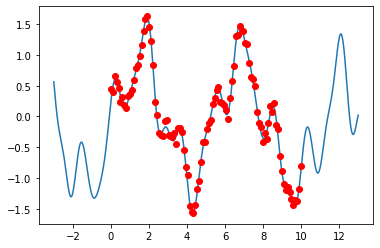

In [57]:
xmodel = np.linspace(-3,13,1000)
ymodel = model.predict(xmodel)
plt.plot(xmodel,ymodel)
plt.plot(xtrain,ytrain,'ro')
plt.show()

In [58]:
model.layers[0].get_weights()


[array([[0.02918489, 0.37407714, 1.1201452 , 1.2464967 , 1.8883977 ,
         2.5079112 , 3.0863645 , 3.7549272 , 3.9755156 , 4.5309086 ,
         5.03739   , 5.357252  , 6.166953  , 6.510211  , 6.8682904 ,
         7.350358  , 8.054099  , 8.482211  , 8.930054  , 9.593426  ]],
       dtype=float32),
 array([ 0.05626441, -0.12363521, -0.01274324, -0.3639255 , -0.2015044 ,
         0.10248336,  0.06762099,  0.7671768 , -0.3143537 , -0.00763978,
         0.24185593, -0.1804774 ,  0.08864275, -0.30107507,  0.01005289,
         0.0304549 ,  0.06054378,  0.16089498, -0.08588282,  0.06559478],
       dtype=float32)]

In [59]:
model.layers[1].get_weights()


[array([[-0.23809123],
        [ 0.15231061],
        [ 0.6819767 ],
        [ 0.32107145],
        [-0.05635592],
        [-0.04178827],
        [-0.0392646 ],
        [ 0.57334375],
        [-0.11002931],
        [ 0.00872474],
        [-0.00486468],
        [-0.01960948],
        [-0.03516287],
        [-0.05256173],
        [ 0.16294284],
        [ 0.04725996],
        [-0.01475311],
        [-0.01919657],
        [ 0.01151877],
        [ 0.01222333]], dtype=float32), array([-0.0536803], dtype=float32)]